In [4]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader

from config import Config
from img_transformer import ImgTransformer
from fliker_img_comment_dataset import ImgCommentDataset
from img_embedding import ImageEmbedding
from img_util import show_img_tensor_CHW

from pathlib import Path


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Enriched img id: /tmp/enriched_results.csv
idx: 76043
idx: 47841
batch_img_tensor: torch.Size([2, 3, 512, 512])
batch_img_id_tensor: torch.Size([2])
batch_comment_encoding: torch.Size([2, 50])


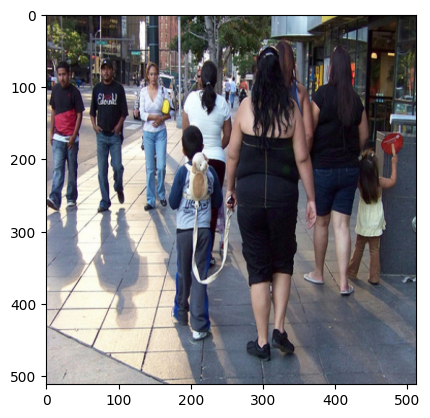

In [5]:
config = Config()
img_comments_folder = Path("/Users/chengbai/ml/dataset/flickr30k_images/")
train_dataset = ImgCommentDataset(config, img_comments_folder, train_test_split="train", train_test_split_portion=0.8)

BATCH_SIZE = 2
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

batch_img_tensor, batch_img_id_tensor, batch_comment_encoding = next(iter(train_dataloader))
print(f"batch_img_tensor: {batch_img_tensor.size()}")
print(f"batch_img_id_tensor: {batch_img_id_tensor.size()}")
print(f"batch_comment_encoding: {batch_comment_encoding.size()}")
show_img_tensor_CHW(img_tensor=batch_img_tensor[0])

In [6]:
img_embedding = ImageEmbedding(config=config)
img_embedding = img_embedding(batch_img_tensor)
print(f"img_encoding: {img_embedding.size()}")

img_trans = ImgTransformer(config=config)
batch_img_feature = img_trans(img_embedding)
print(f"batch_img_feature: {batch_img_feature.size()}")

img_encoding: torch.Size([2, 1024, 728])
batch_img_feature: torch.Size([2, 1024, 728])
